In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style='darkgrid')
sns.set()
%matplotlib inline

In [38]:
train= pd.read_csv("./data/train.csv")
test=pd.read_csv("./data/test.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
train.shape

(891, 12)

In [41]:
test.shape

(418, 11)

In [42]:
train.info()
#빠진정보는 유실된 정보이다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
test.isnull().sum(
)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
def bar_chart(feature):
    survived= train[train['Survived']==1][feature].value_counts()
    dead= train[train['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived,dead])
    df.index= ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

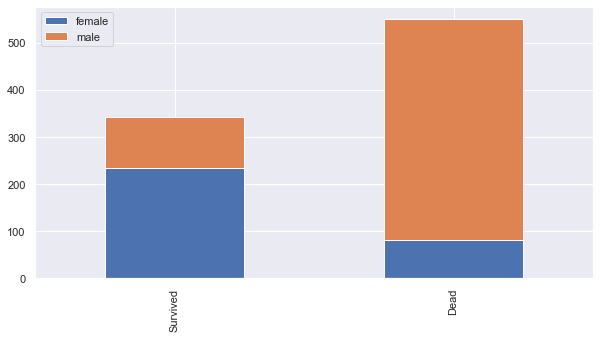

In [47]:
bar_chart('Sex')
#여자가 더 생존함

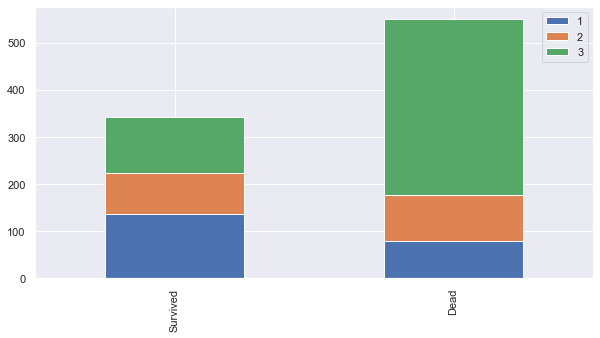

In [48]:
bar_chart('Pclass')
#1등석이 3등석보다 많이 살아남음

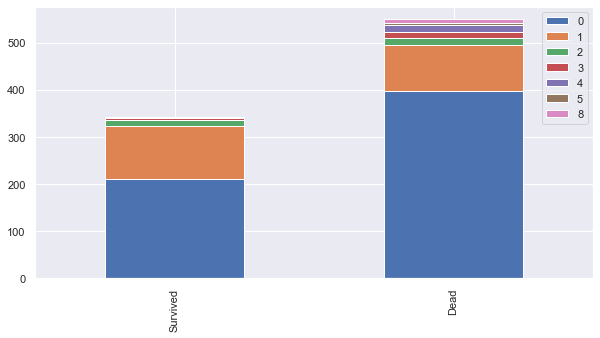

In [49]:
bar_chart('SibSp')
#혼자간 경우보다 가족이랑 같이 간 경우 더 살아남음

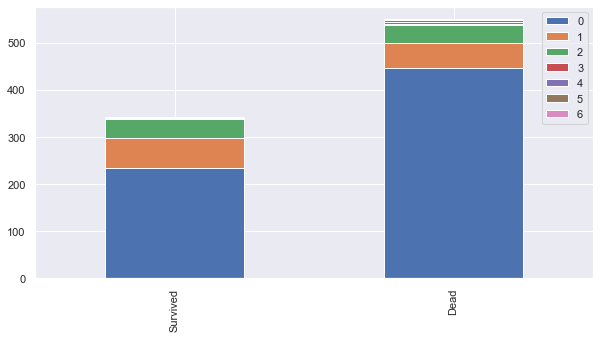

In [50]:
bar_chart('Parch')
#자녀가 있는경우 더 살아남았음

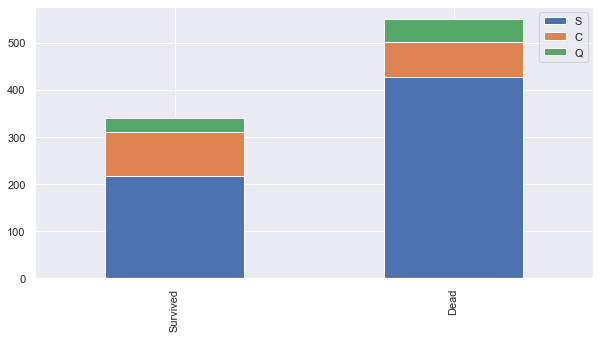

In [51]:
bar_chart('Embarked')
#선착장에따른 생존여부는 큰의미가 없음

# 이름

In [52]:
train_test_data=[train,test]

for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [53]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Mme           1
Sir           1
Capt          1
Countess      1
Lady          1
Ms            1
Don           1
Name: Title, dtype: int64

In [54]:
title_mapping = {"Mr":0, "Miss":1,"Mrs":2,"Master":3, "Dr":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,"Ms":3,"Lady":3,"Jonkheer":3,"Don":3,
                "Dona":3,"Mme":3,"Capt":3,"Sir":3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)
    #매핑(mapping)은 키(key) 역할을 하는 데이터와 값(value) 역할을 하는 데이터를 하나씩 짝지어 저장하는 데이터 구조다.
    #딕셔너리 를 생각하면 된다.

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


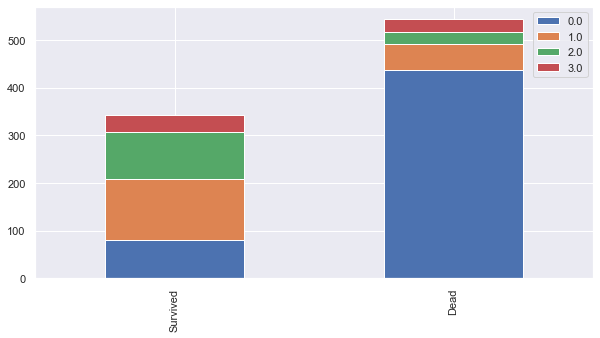

In [56]:
bar_chart('Title')

In [57]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1, inplace=True)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [59]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


# 성별

In [60]:
sex_mapping= {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
     #구문함수 이해 잘하기/반목문 딕셔너리(가변함수)

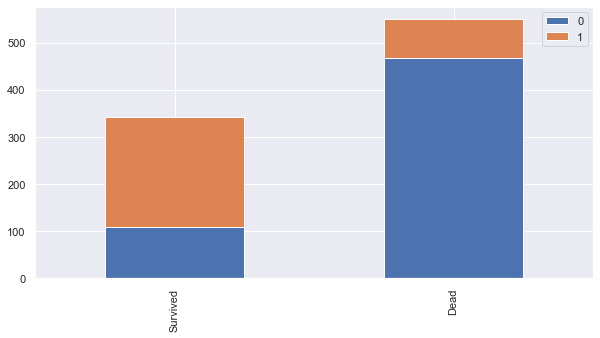

In [61]:
bar_chart('Sex')

# 빈자리의 평균나이 구하기

In [62]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


nan으로 비어있는 부분을 성별/결혼여부에 따라 그에따른 평균으로 나타내기

In [63]:
# fill missing age  with median age for each title(Mr, Mrs,Miss,others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

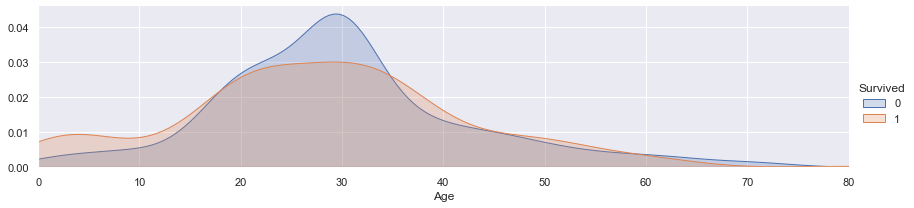

In [64]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

1.커널 밀도 추정(KDE: Kernel Density Estimator)이란??
쉽게 얘기하면 히스토그램 같은 분포를 스무딩~ 부드럽게 곡선화(?) 시켜서 그려주는 거다 +shade: 곡선 아래의 공간을 음영 처리할지 결정 (True/False)
2.FacetGrid(data, row, col, hue) : 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다. 도화지에 축을 나누는것과 같다. 


(0.0, 20.0)

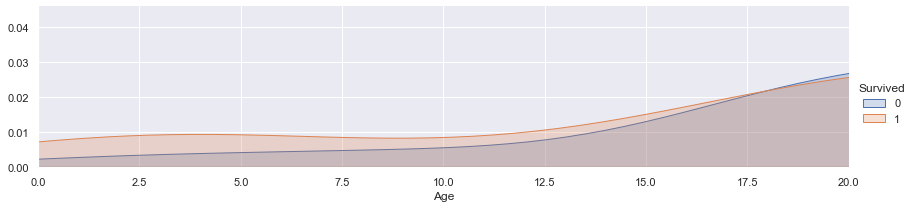

In [65]:
facet=sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
#0~20세까지의 생존그래프

(20.0, 30.0)

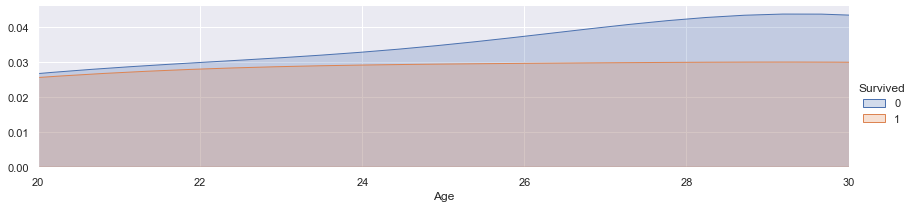

In [66]:
facet=sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)
#20~30세까지의 생존그래프

(30.0, 40.0)

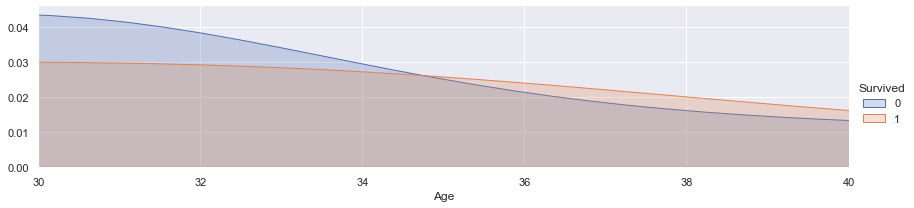

In [67]:
facet=sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)
#30~40세까지의 생존그래프

(40.0, 80.0)

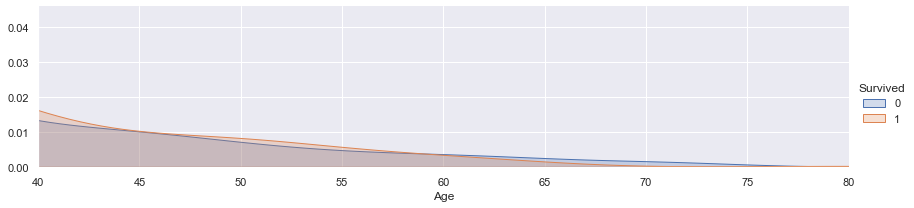

In [68]:
facet=sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,train['Age'].max())
#40~나머지 까지의 생존그래프

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        885 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        416 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


# binning

# 문제가해결이안됨!!!

child:0
young:1
adult:2
mid-age:3
senior:4

In [109]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    
    #영상과 달리쉼표를 제거해야 한다

In [110]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,NaN,NaN,0.0
1,2,1,1,1,0.0,1,0,PC 17599,2.0,C85,NaN,2.0
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,0.0,NaN,NaN,1.0
3,4,1,1,1,0.0,1,0,113803,2.0,C123,NaN,2.0
4,5,0,3,0,0.0,0,0,373450,0.0,NaN,NaN,0.0


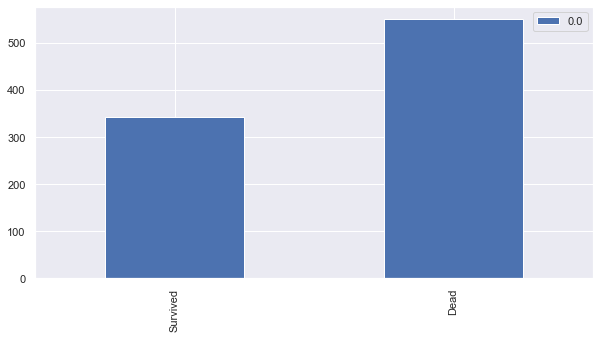

In [111]:
bar_chart('Age')
#이 문제는해결이안됨!!!!

# Embarked 어디서 탔는지

<AxesSubplot:>

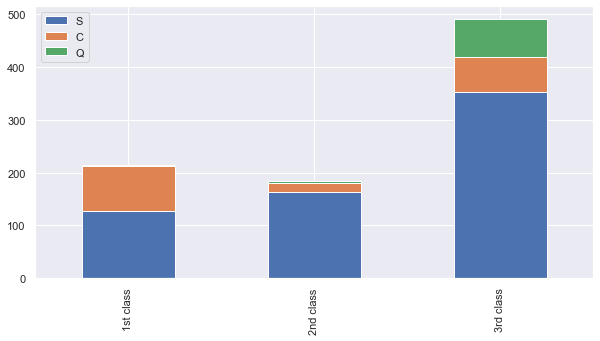

In [82]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

q에탄 사람들이 3등석이 대부분 차지하므로 더 많이 죽었을것으로 예상된다.

In [83]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [84]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,0.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,0.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,0.0,0,0,373450,8.0500,NaN,S,0.0


In [87]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)


# fare 티켓가격에 따른 생존여부

In [88]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,NaN,NaN,0.0
1,2,1,1,1,0.0,1,0,PC 17599,71.2833,C85,NaN,2.0
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,1.0
3,4,1,1,1,0.0,1,0,113803,53.1000,C123,NaN,2.0
4,5,0,3,0,0.0,0,0,373450,8.0500,NaN,NaN,0.0
5,6,0,3,0,0.0,0,0,330877,8.4583,NaN,NaN,0.0
6,7,0,1,0,0.0,0,0,17463,51.8625,E46,NaN,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,NaN,3.0
8,9,1,3,1,0.0,0,2,347742,11.1333,NaN,NaN,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,NaN,2.0


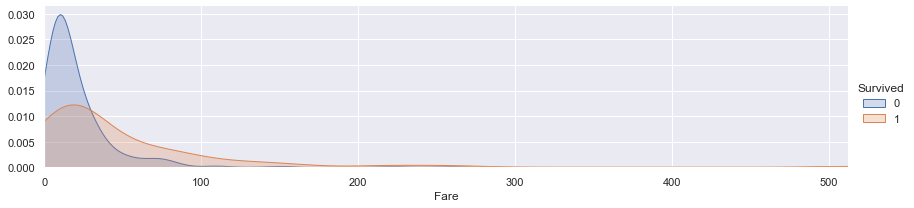

In [89]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()


(0.0, 20.0)

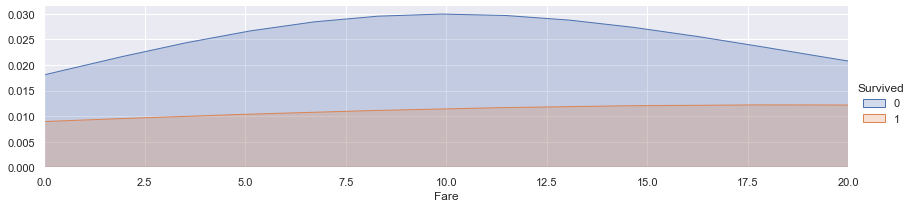

In [90]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

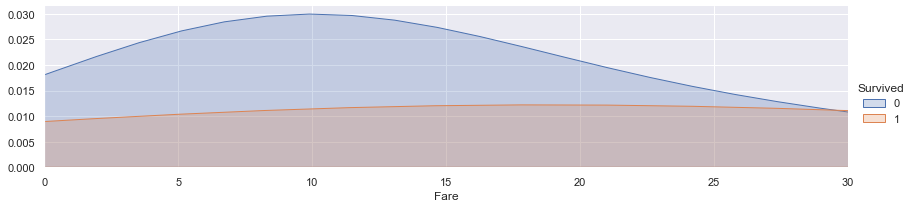

In [91]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

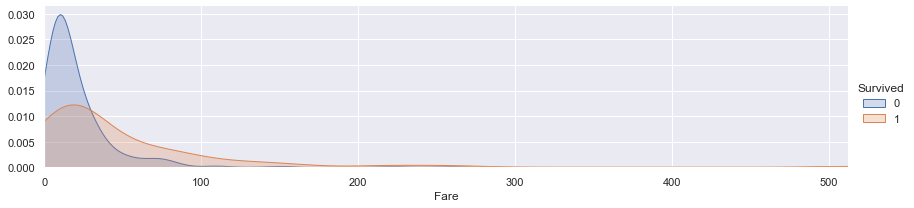

In [92]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [107]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [108]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,NaN,NaN,0.0
1,2,1,1,1,0.0,1,0,PC 17599,2.0,C85,NaN,2.0
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,0.0,NaN,NaN,1.0
3,4,1,1,1,0.0,1,0,113803,2.0,C123,NaN,2.0
4,5,0,3,0,0.0,0,0,373450,0.0,NaN,NaN,0.0


# cabin

In [112]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
C22 C26        3
              ..
E63            1
D37            1
B39            1
B4             1
C90            1
Name: Cabin, Length: 147, dtype: int64

In [113]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

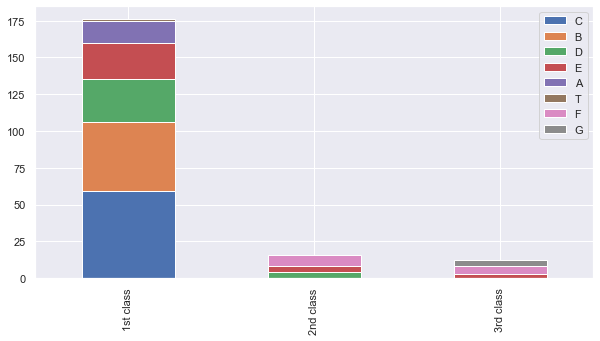

In [114]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [115]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
    #가격차이가(10달러차이) 남녀차이(남1,여0)를 방지하기위해 차이를 소수점으로 나타내기

In [116]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# familysize

In [117]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

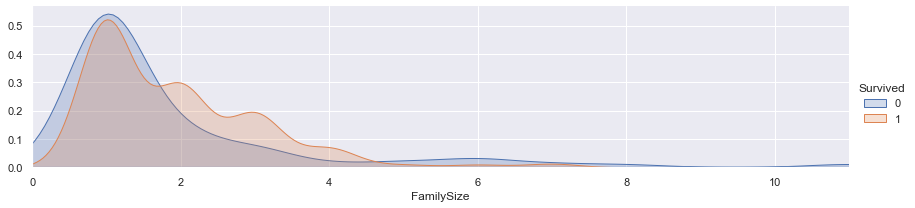

In [118]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [119]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [120]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,2.0,NaN,0.0,0.4
1,2,1,1,1,0.0,1,0,PC 17599,2.0,0.8,NaN,2.0,0.4
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,0.0,2.0,NaN,1.0,0.0
3,4,1,1,1,0.0,1,0,113803,2.0,0.8,NaN,2.0,0.4
4,5,0,3,0,0.0,0,0,373450,0.0,2.0,NaN,0.0,0.0


In [121]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [122]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [123]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,0.0,0.0,2.0,NaN,0.0,0.4
1,1,1,0.0,2.0,0.8,NaN,2.0,0.4
2,3,1,0.0,0.0,2.0,NaN,1.0,0.0
3,1,1,0.0,2.0,0.8,NaN,2.0,0.4
4,3,0,0.0,0.0,2.0,NaN,0.0,0.0
5,3,0,0.0,0.0,2.0,NaN,0.0,0.0
6,1,0,0.0,2.0,1.6,NaN,0.0,0.0
7,3,0,0.0,1.0,2.0,NaN,3.0,1.6
8,3,1,0.0,0.0,2.0,NaN,2.0,0.8
9,2,1,0.0,2.0,1.8,NaN,2.0,0.4
